In [241]:
import os
import pandas as pd
import numpy as np

# not import for now since tf not working on mine Mac rn
#import tensorflow as tf

from pandas.core.common import random_state

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

# Cross validation part (ADAM to merge)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from datetime import datetime

In [19]:
dirName_trainData = 'https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/epl-full-training.csv'

In [20]:
df_epl = pd.read_csv(dirName_trainData)
cols = ["Div","Date","HomeTeam","AwayTeam","FTHG", "FTAG","FTR","HTHG","HTAG","HTR","HS","AS", "HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]

df_epl = df_epl.loc[:, cols]
df_epl = df_epl.reset_index(drop=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_epl.head())

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,17/08/2002,Blackburn,Sunderland,0,0,D,0,0,D,15,7,5,3,14,11,9,1,1,2,0,0
1,E0,17/08/2002,Charlton,Chelsea,2,3,A,2,1,H,5,21,5,12,10,12,3,6,0,3,1,0
2,E0,17/08/2002,Everton,Tottenham,2,2,D,1,0,H,13,10,9,5,18,4,10,5,1,1,0,0
3,E0,17/08/2002,Fulham,Bolton,4,1,H,3,1,H,13,3,6,1,16,12,7,4,1,2,0,0
4,E0,17/08/2002,Leeds,Man City,3,0,H,2,0,H,13,18,8,10,13,13,2,7,1,1,0,0


In [21]:
# Transform the date column from strings into datetime objects
df_epl["Date"] = pd.to_datetime(df_epl["Date"], dayfirst=True)
# Turn the catergorical data into labels using same method from before
df_epl["AwayTeam_Enc"] = df_epl["AwayTeam"].astype("category").cat.codes
df_epl["HomeTeam_Enc"] = df_epl["HomeTeam"].astype("category").cat.codes
df_epl = df_epl.drop(['HomeTeam', 'AwayTeam', 'Div'], axis=1)
# Transform the date column into day and month columns and Add into dataframe (Extract days & months from date)
df_epl["Date"] = pd.to_datetime(df_epl["Date"])
df_epl["Day"] = df_epl["Date"].dt.day
df_epl["Month"] = df_epl["Date"].dt.month 
df_epl["Year"] = df_epl["Date"].dt.year

In [22]:
df_epl.head()

,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,...,AC,HY,AY,HR,AR,AwayTeam_Enc,HomeTeam_Enc,Day,Month,Year
0,2002-08-17,0,0,D,0,0,D,15,7,5,...,1,1,2,0,0,34,3,17,8,2002
1,2002-08-17,2,3,A,2,1,H,5,21,5,...,6,0,3,1,0,12,11,17,8,2002
2,2002-08-17,2,2,D,1,0,H,13,10,9,...,5,1,1,0,0,36,15,17,8,2002
3,2002-08-17,4,1,H,3,1,H,13,3,6,...,4,1,2,0,0,5,16,17,8,2002
4,2002-08-17,3,0,H,2,0,H,13,18,8,...,7,1,1,0,0,22,19,17,8,2002


## Feature Engineering & Models

### **METHOD & EVALUATION**

In [23]:
def evaluate_report(y_pred, y_test):
  print("Accuracy: ", accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### OPTIMIZATION & Cross validation

* For every Feature set, we try the following classifiers
    - Decision Tree
    - Random Forest
    - K-Nearest Neighbours (KNN)
    - Support Vector Machine
    - XGBOOST [NOT IN NOTEBOOK YET]
    - NN [NOT IN NOTEBOOK YET]
- Linear Regreesion (Only used when prdicting the result goals)

In [252]:
# TODO: remove this cell
# model = DecisionTreeClassifier()
# model.get_params()

# model = RandomForestClassifier()
# model.get_params()

# model = KNeighborsClassifier()
# model.get_params()

# model = svm.SVC()
# model.get_params()

In [253]:
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

def evaluate_report(y_pred, y_test):
  print("Accuracy: ", accuracy_score(y_test,y_pred))
  # handle f1 score zero division
  # https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division
  print(classification_report(y_test, y_pred, zero_division=0))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# TODO: need refactory if more than 2 scroing funcions are used
def plot_train_test_acc(results , scoring, param_x = "param_max_depth",title="GridSearchCV evaluation", xlabel="max_depth", ylabel="Score",xlim=(0,100), ylim=(0.4,1), fig_size=(9, 9)):

    # REF:https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
    plt.figure(figsize=fig_size)
    plt.title(title, fontsize=16)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax = plt.gca()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results[param_x].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ["g", "k"]):
        for sample, style in (("train", "--"), ("test", "-")):
            sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
            sample_score_std = results["std_%s_%s" % (sample, scorer)]
            ax.fill_between(
                X_axis,
                sample_score_mean - sample_score_std,
                sample_score_mean + sample_score_std,
                alpha=0.1 if sample == "test" else 0,
                color=color,
            )
            ax.plot(
                X_axis,
                sample_score_mean,
                style,
                color=color,
                alpha=1 if sample == "test" else 0.7,
                label="%s (%s)" % (scorer, sample),
            )

        best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
        best_score = results["mean_test_%s" % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot(
            [
                X_axis[best_index],
            ]
            * 2,
            [0, best_score],
            linestyle="-.",
            color=color,
            marker="x",
            markeredgewidth=3,
            ms=8,
        )
    
        # Annotate the best score for that scorer
        ax.annotate("%0.4f" % best_score, (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

  

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

"""
NOTE: Scoring metrics
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
"""
scoring = {"Accuracy": "accuracy"}
# TODO: check which split to use. Use TimeSeriesSplit as cross validation spliter, use k=5 as default
#cv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
cv = StratifiedKFold(n_splits= 5, shuffle= False, random_state=None)

"""Decision Tree"""
def fit_DT(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': None,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'random_state': None,
    'splitter': 'best'}
    """
 
    classifier = DecisionTreeClassifier(random_state=42)
    # Oonly tweaked the depth here as an example
    param_grid = {'max_depth':[1,2,3,5,10,15,16,17,18,19,20,25,30,40,50,70,100]}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit="Accuracy")
    clf = grid.fit(X, y)

    return clf

def fit_RF(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}
    """
    
    classifier = RandomForestClassifier(random_state=42)
    # Oonly tweaked the depth here as an example
    param_grid = {'max_depth':[1,2,3,5,10,15,16,17,18,19,20,25,30,40,50,70,100]}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit="Accuracy")
    clf = grid.fit(X, y)

    return clf

def fit_KNN(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'algorithm': 'auto',
    'leaf_size': 30,
    'metric': 'minkowski',
    'metric_params': None,
    'n_jobs': None,
    'n_neighbors': 5,
    'p': 2,
    'weights': 'uniform'}
    """
    classifier = KNeighborsClassifier()
    # Oonly tweaked the depth here as an example
    param_grid = {'n_neighbors':[1,2,3,5,10,15, 20, 25, 30, 40, 50, 70, 100]}
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit="Accuracy")
    clf = grid.fit(X, y)

    return clf

def fit_SVM(X, y):
    """ Parameters can be tweaked for regularization (more options see sklearn documentation)
    {'C': 1.0,
    'break_ties': False,
    'cache_size': 200,
    'class_weight': None,
    'coef0': 0.0,
    'decision_function_shape': 'ovr',
    'degree': 3,
    'gamma': 'scale',
    'kernel': 'rbf',
    'max_iter': -1,
    'probability': False,
    'random_state': None,
    'shrinking': True,
    'tol': 0.001,
    'verbose': False}
    """
    classifier = svm.SVC()
    # Oonly tweaked the depth here as an example
    param_grid = {'C':[1.0,5.0,10.0,15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 70.0, 100.0]
                  }
    # NOTE: more option eg. custom scoring metric avaliable -> see sklearn doc
    # n_jobs used for optimization (use all processor)
    # verbose -> display detail (0,1,>1) higher -> more detailed
    grid = GridSearchCV(
        classifier, 
        param_grid=param_grid, 
        cv=cv, 
        verbose=1, 
        n_jobs=-1, 
        scoring=scoring, 
        return_train_score=True,
        refit="Accuracy")
    clf = grid.fit(X, y)

    return clf


### **FEATURE SET 2** - Simple: (HomeTeam, AwayTeam and Month) 

*SUMMARY ->* Firstly, we trained models only using the home team, away team and month as feature set. We evaluated and compared these models.
Since these models have not lead to great accuracies, we did not perform model selection on them. As the models become more complex (and include more features) we start to include the results from model selection.

(NOTE: We have also tried variations of this MODEL - with other basic features like day and referee added)

In [255]:
def create_df(df_epl):
  return df_epl.copy()

def create_design_matrix(df):
  X = df.loc[:,['HomeTeam_Enc', 'AwayTeam_Enc', 'Month']].values
  return X

df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# Check shape of y_train and y_test

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train)

/opt/homebrew/anaconda3/envs/COMP0036/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree Classifier

In [256]:
clf = fit_DT(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


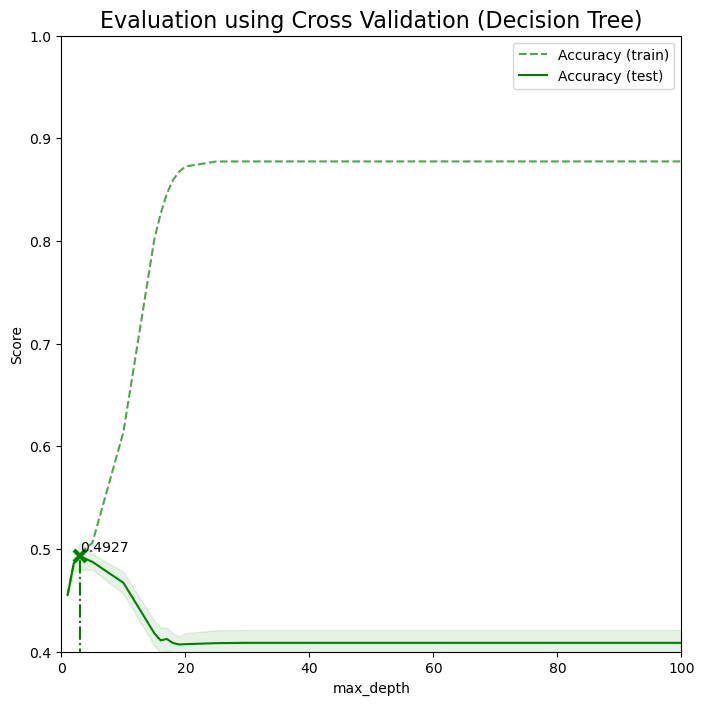

In [257]:
plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Decision Tree)", xlabel="max_depth", ylabel="Score", fig_size=(8,8))

Accuracy:  0.49612403100775193
              precision    recall  f1-score   support

           A       0.42      0.30      0.35       429
           D       0.00      0.00      0.00       382
           H       0.51      0.87      0.65       737

    accuracy                           0.50      1548
   macro avg       0.31      0.39      0.33      1548
weighted avg       0.36      0.50      0.40      1548



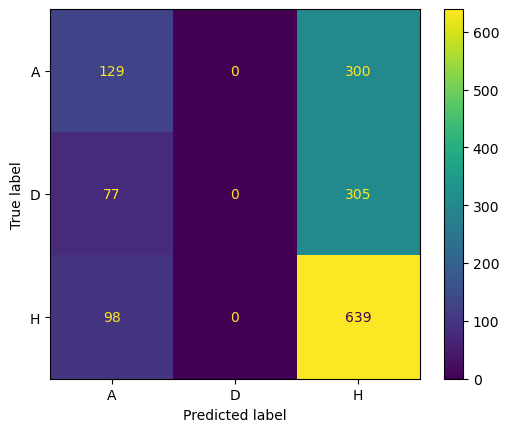

In [230]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### Random Forest Classifier

In [231]:
clf = fit_RF(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


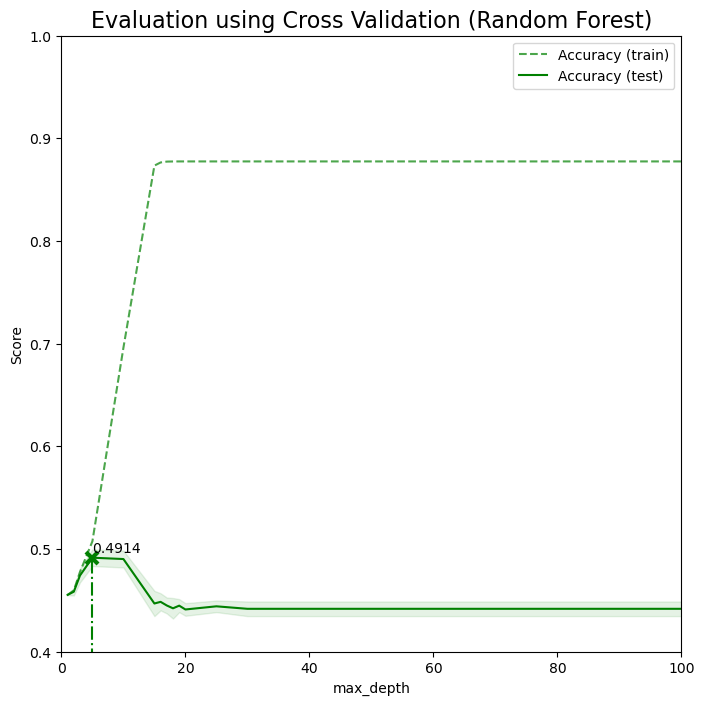

In [232]:
plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Random Forest)", xlabel="max_depth", ylabel="Score", fig_size=(8,8))

Accuracy:  0.5025839793281653
              precision    recall  f1-score   support

           A       0.44      0.30      0.36       429
           D       0.00      0.00      0.00       382
           H       0.52      0.88      0.65       737

    accuracy                           0.50      1548
   macro avg       0.32      0.39      0.34      1548
weighted avg       0.37      0.50      0.41      1548



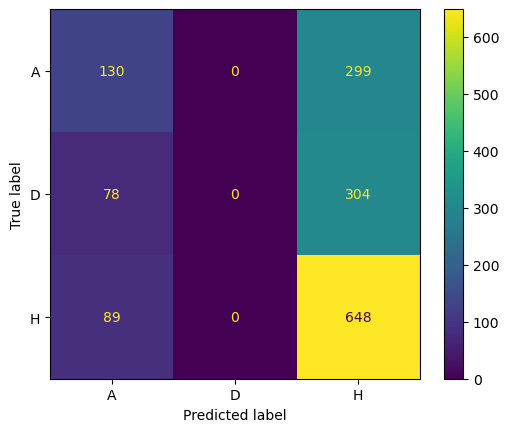

In [233]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### K-Nearest Neighbours (KNN)

In [235]:
clf = fit_KNN(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


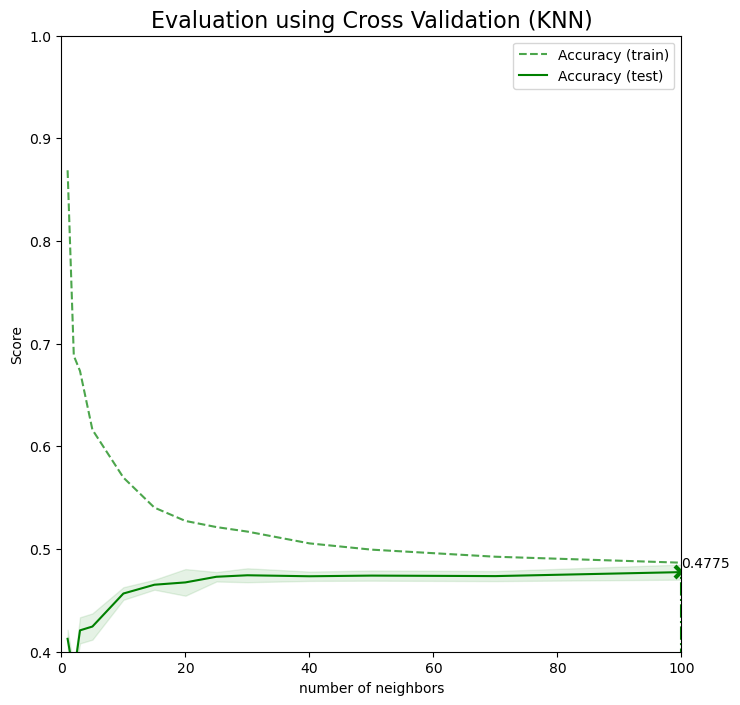

In [236]:
plot_train_test_acc(results, scoring,param_x="param_n_neighbors", title="Evaluation using Cross Validation (KNN)", xlabel="number of neighbors", ylabel="Score", fig_size=(8,8))

Accuracy:  0.47351421188630494
              precision    recall  f1-score   support

           A       0.38      0.30      0.34       429
           D       0.22      0.02      0.03       382
           H       0.51      0.81      0.62       737

    accuracy                           0.47      1548
   macro avg       0.37      0.38      0.33      1548
weighted avg       0.40      0.47      0.40      1548



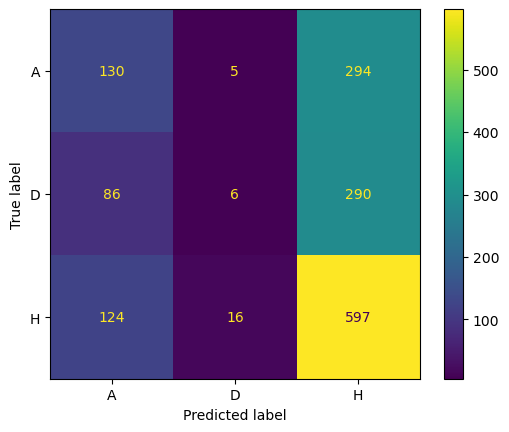

In [237]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### SVM

In [247]:
clf = fit_SVM(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


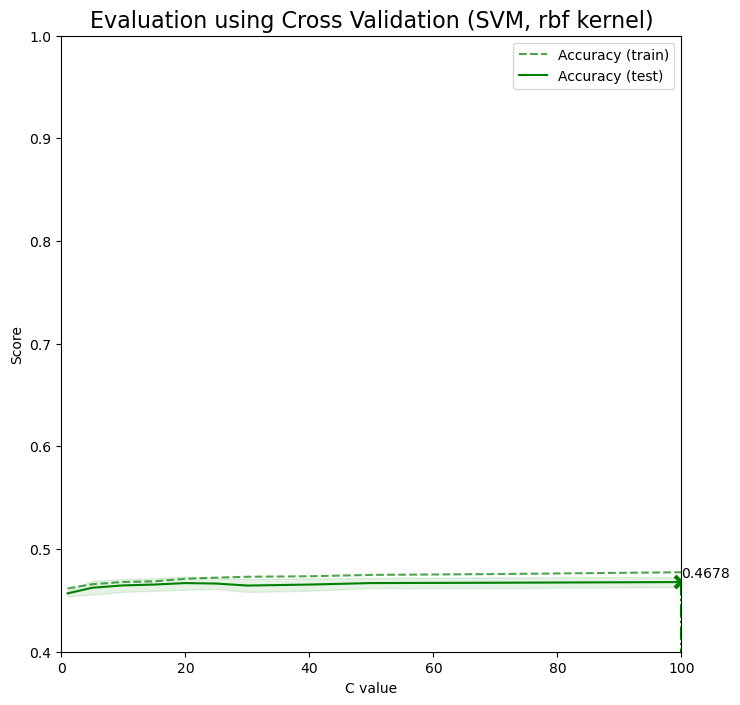

In [249]:
plot_train_test_acc(results, scoring,param_x="param_C", title="Evaluation using Cross Validation (SVM, rbf kernel)", xlabel="C value", ylabel="Score", fig_size=(8,8))

Accuracy:  0.4715762273901809
              precision    recall  f1-score   support

           A       0.36      0.25      0.30       429
           D       0.00      0.00      0.00       382
           H       0.50      0.84      0.63       737

    accuracy                           0.47      1548
   macro avg       0.29      0.37      0.31      1548
weighted avg       0.34      0.47      0.38      1548



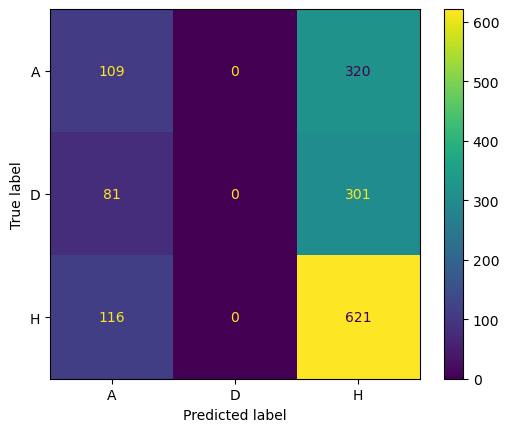

In [251]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

### **FEATURE SET 5** - Combines FEATURE SET 3 & 4

#### Create Dataframe & Design Matrix

In [259]:
# HELPER FUNCTIONS FOR CREATE_DF()
def get_season_start_date(date):
    if date.month <= 7:
        return datetime(date.year-1, 8, 1)
    return datetime(date.year-0, 8, 1)

def filter_dataframe_by_bothteams_history(df, date, HomeTeam, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Date
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.HomeTeam_Enc==HomeTeam) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_hometeam_recent_season(df, date, HomeTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.HomeTeam_Enc==HomeTeam)]

    # Return filtered dataframe
    return df_filtered

def filter_dataframe_by_awayteam_recent_season(df, date, AwayTeam):
    # Convert the input string date into datetime
    date = pd.to_datetime(date, dayfirst=True)

    # Filter the dataframe to include only rows where Dateinput(first day of season) && HomeTeam=input(HomeTeam)
    df_filtered = df.copy()
    df_filtered = df_filtered[(df_filtered.Date<date) & (df_filtered.Date>get_season_start_date(date)) & (df_filtered.AwayTeam_Enc==AwayTeam)]

    # Return filtered dataframe
    return df_filtered

# This function takes as input the filtered dataframe from previous cell, features to average and a dictionary,
# it then appends an average of each feature to the dictionary
def average_columns(avg_features, filtered_df):
    for feature in avg_features.keys():
        df_col_means = filtered_df[feature].mean()
        avg_features[feature].append(df_col_means)



# CREATE FEATURES & ADD TO ORIGINAL DATAFRAME
def create_df(df):
  df_final = df_epl.copy()
  # These are the features we want to get averages for both teams
  avg_features_both = {
                      "FTHG": [],
                      "FTAG": [],
                      "HTHG": [],
                      "HTAG": [],
                      "HS"  : [],
                      "AS"  : [],
                      "HST" : [],
                      "AST" : [],
                      "HF"  : [],
                      "AF"  : [],
                      "HC"  : [],
                      "AC"  : [],
                      "HY"  : [],
                      "AY"  : [],
                      "HR"  : [],
                      "AR"  : []
                  }

  # These are the features we want to get averages for home team
  avg_features_home = {
                      "FTHG": [],
                      "HTHG": [],
                      "HS"  : [],
                      "HST" : [],
                      "HF"  : [],
                      "HC"  : [],
                      "HY"  : [],
                      "HR"  : [],
                  }

  # These are the features we want to get averages for away team
  avg_features_away = {
                      "FTAG": [],
                      "HTAG": [],
                      "AS"  : [],
                      "AST" : [],
                      "AF"  : [],
                      "AC"  : [],
                      "AY"  : [],
                      "AR"  : []
                    }

  # Run the two functions on each row of the df_epl_train and fill the dictionary, For each row in the dataframe
  for index, row in df_final.iterrows():
      # Filter the dataframe to only show matches played between those teams and before the certain date
      df_epl_train_average_bothteams_history = filter_dataframe_by_bothteams_history(df_final, row["Date"],row["HomeTeam_Enc"],row["AwayTeam_Enc"])
      df_epl_train_average_hometeam_recent_season = filter_dataframe_by_hometeam_recent_season(df_final, row["Date"],row["HomeTeam_Enc"])
      df_epl_train_average_awayteam_recent_season = filter_dataframe_by_awayteam_recent_season(df_final, row["Date"],row["AwayTeam_Enc"])
      # Get averages from the filtered dataframe and add the the dictionary
      average_columns(avg_features_both, df_epl_train_average_bothteams_history)
      average_columns(avg_features_home, df_epl_train_average_hometeam_recent_season)
      average_columns(avg_features_away, df_epl_train_average_awayteam_recent_season)

  for feature in avg_features_both.keys():
      # Get the list of averages for a certain feature from the dicitonary
      feature_vals = avg_features_both[feature]
      # Add the list of averages into the dataframe for that certain feature
      df_final[feature + "_HISTORY"] = feature_vals

  for feature in avg_features_home.keys():
      # Get the list of averages for a certain feature from the dicitonary
      feature_vals = avg_features_home[feature]
      # Add the list of averages into the dataframe for that certain feature
      df_final[feature + "_AVG"] = feature_vals
      
  for feature in avg_features_away.keys():
      # Get the list of averages for a certain feature from the dicitonary
      feature_vals = avg_features_away[feature]
      # Add the list of averages into the dataframe for that certain feature
      df_final[feature + "_AVG"] = feature_vals

  # Drop any rows with nan
  return df_final.dropna()



# CODE TO CREATE DESIGN MATRIX
def create_design_matrix(df):
  X = df.loc[:,['Day', 'Month', 'HomeTeam_Enc', 'AwayTeam_Enc',
                              'HS_HISTORY','AS_HISTORY','HST_HISTORY','AST_HISTORY','HF_HISTORY','AF_HISTORY','HC_HISTORY','AC_HISTORY','HY_HISTORY','AY_HISTORY','HR_HISTORY','AR_HISTORY',
                              'HS_AVG','AS_AVG','HST_AVG','AST_AVG','HF_AVG','AF_AVG','HC_AVG','AC_AVG','HY_AVG','AY_AVG','HR_AVG','AR_AVG']].values
  # X = df.drop(['FTR', 'Date'], axis=1).values
  return X



# MAIN CODE
df_final = create_df(df_epl)
X = create_design_matrix(df_final)
y = df_final.loc[:,['FTR']].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

FTR_encoder = LabelEncoder()
y_train = FTR_encoder.fit_transform(y_train);

/opt/homebrew/anaconda3/envs/COMP0036/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Tree Classifier

#### Decision Tree Classifier

In [260]:
clf = fit_DT(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


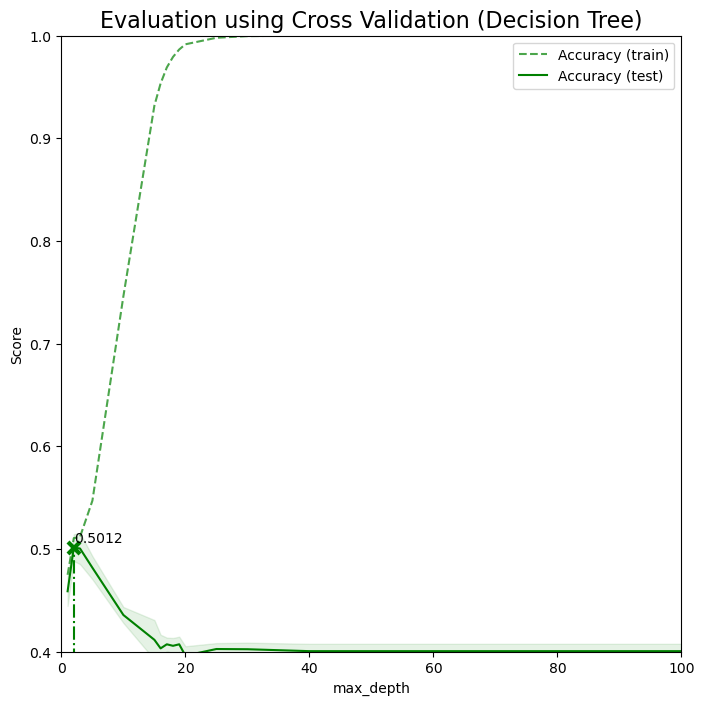

In [261]:
plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Decision Tree)", xlabel="max_depth", ylabel="Score", fig_size=(8,8))

Accuracy:  0.5320566194837635
              precision    recall  f1-score   support

           A       0.51      0.41      0.45       347
           D       0.00      0.00      0.00       290
           H       0.54      0.88      0.67       564

    accuracy                           0.53      1201
   macro avg       0.35      0.43      0.37      1201
weighted avg       0.40      0.53      0.45      1201



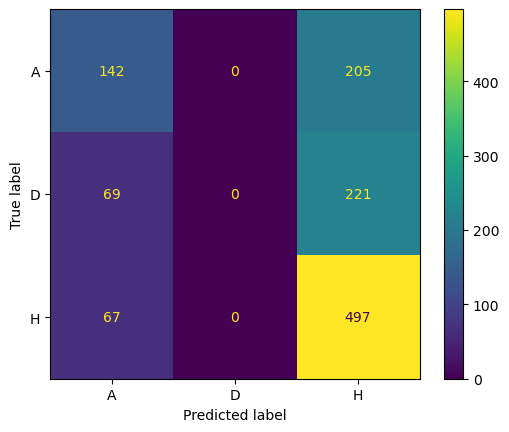

In [262]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### Random Forest Classifier

In [263]:
clf = fit_RF(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


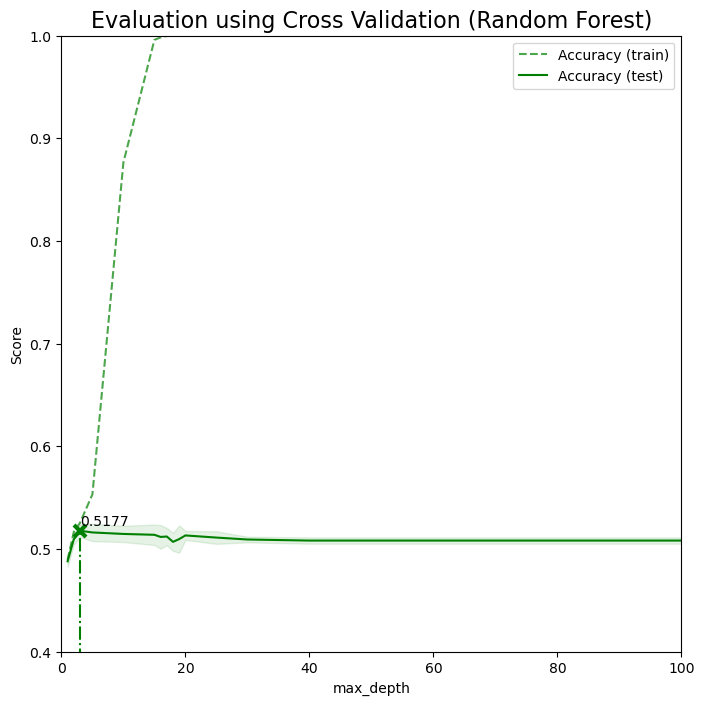

In [264]:
plot_train_test_acc(results, scoring, title="Evaluation using Cross Validation (Random Forest)", xlabel="max_depth", ylabel="Score", fig_size=(8,8))

Accuracy:  0.5353871773522065
              precision    recall  f1-score   support

           A       0.53      0.41      0.46       347
           D       0.00      0.00      0.00       290
           H       0.54      0.89      0.67       564

    accuracy                           0.54      1201
   macro avg       0.35      0.43      0.38      1201
weighted avg       0.40      0.54      0.45      1201



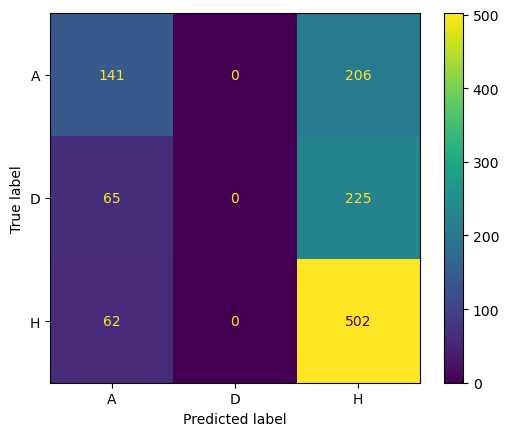

In [265]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### K-Nearest Neighbours (KNN)

In [266]:
clf = fit_KNN(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


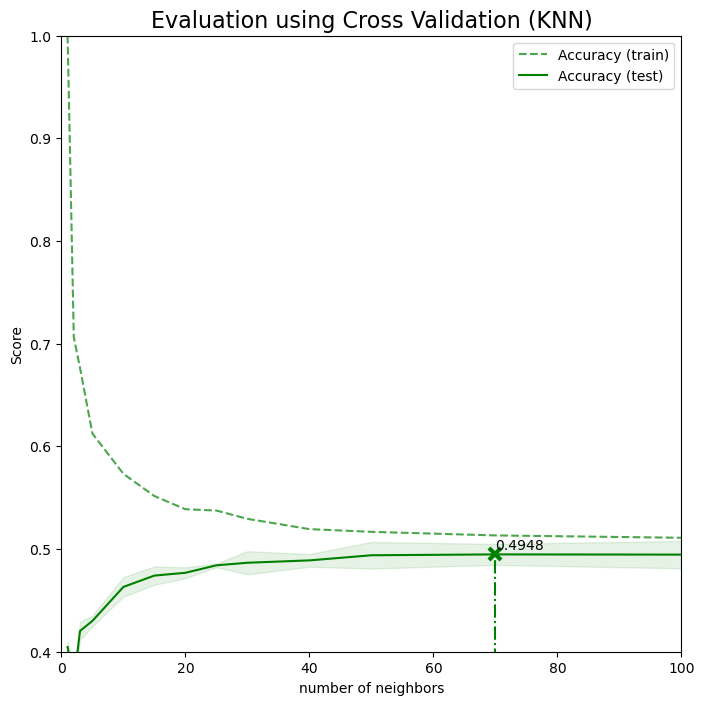

In [267]:
plot_train_test_acc(results, scoring,param_x="param_n_neighbors", title="Evaluation using Cross Validation (KNN)", xlabel="number of neighbors", ylabel="Score", fig_size=(8,8))

Accuracy:  0.5220649458784347
              precision    recall  f1-score   support

           A       0.48      0.44      0.46       347
           D       0.29      0.04      0.07       290
           H       0.55      0.82      0.66       564

    accuracy                           0.52      1201
   macro avg       0.44      0.43      0.39      1201
weighted avg       0.47      0.52      0.46      1201



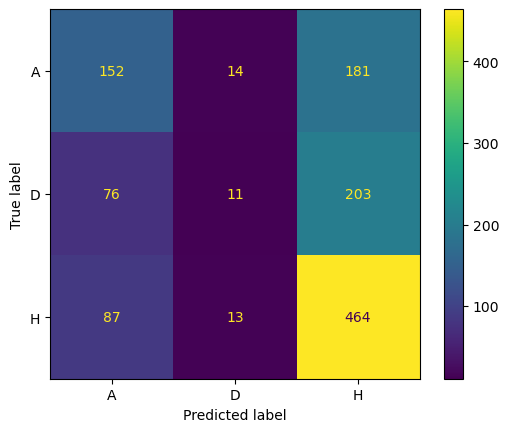

In [268]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)

#### SVM

In [269]:
clf = fit_SVM(X_train, y_train)
results = clf.cv_results_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


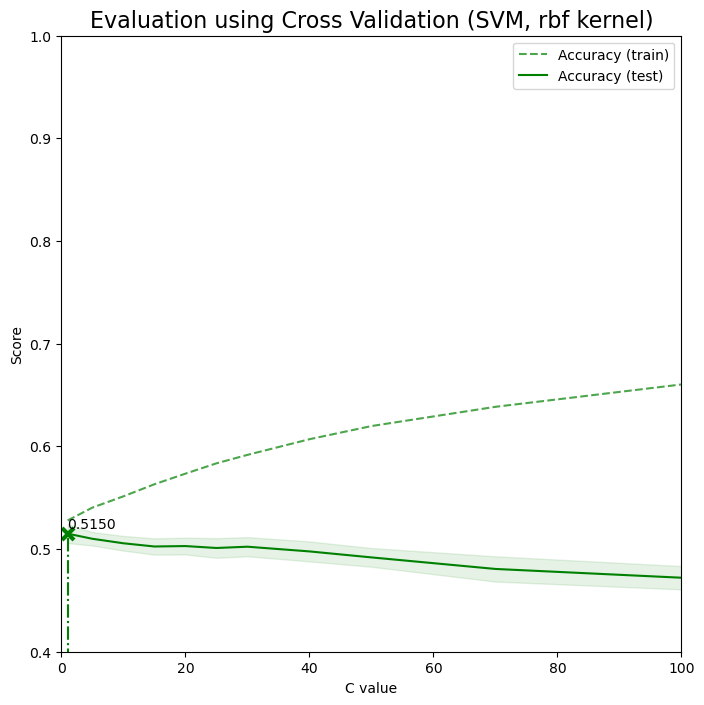

In [270]:
plot_train_test_acc(results, scoring,param_x="param_C", title="Evaluation using Cross Validation (SVM, rbf kernel)", xlabel="C value", ylabel="Score", fig_size=(8,8))

Accuracy:  0.5378850957535387
              precision    recall  f1-score   support

           A       0.53      0.44      0.48       347
           D       0.00      0.00      0.00       290
           H       0.54      0.87      0.67       564

    accuracy                           0.54      1201
   macro avg       0.36      0.44      0.38      1201
weighted avg       0.41      0.54      0.45      1201



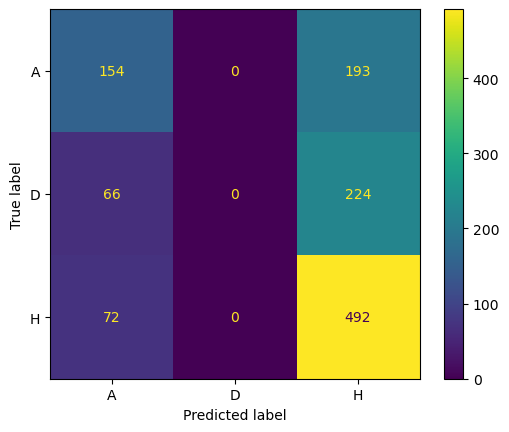

In [271]:
best_clf = clf.best_estimator_
# Make predictions using the model we have created
y_pred = best_clf.predict(X_test)
# Reconverting prediction values (i.e. 0, 1 or 2) back into (H, D or A) using the FTR_encoder defined in earlier cell
y_pred = FTR_encoder.inverse_transform(y_pred)
evaluate_report(y_pred, y_test)